In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',55)
import warnings
warnings.filterwarnings('ignore')
print('Complete')

Complete


In [2]:
#Importing the dataset
df=pd.read_csv('DataCoSupplyChainDataset.csv',encoding='ANSI')
df.head(2)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class


In [ ]:
df.describe()

In [4]:
#percentage of null value counts in the columns greater than 0.which means these columns have null values
null_percentage=df.isnull().sum()/len(df)*100
null_percentage[null_percentage!=0]

Customer Lname           0.004432
Customer Zipcode         0.001662
Order Zipcode           86.239676
Product Description    100.000000
dtype: float64

In [55]:
df['Order Zipcode'].value_counts()

10035.0    648
10009.0    550
10024.0    541
94122.0    526
10011.0    463
          ... 
63376.0      1
31088.0      1
32174.0      1
60477.0      1
61832.0      1
Name: Order Zipcode, Length: 609, dtype: int64

 No pattern found with zip code, Hence we drop zip code and Product Description

In [56]:
#Order Zipcode,Product Description has lot of null values.so we are dropping it
print('Before dropping  :',len(df.columns))
df.drop(['Order Zipcode','Product Description'],axis=1,inplace=True)
print('After dropping  :',len(df.columns))

Before dropping  : 53
After dropping  : 51


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 51 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [58]:
df.describe(include='all')

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Product Card Id,Product Category Id,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
count,180519,180519.000000,180519.000000,180519.000000,180519.000000,180519,180519.000000,180519.000000,180519,180519,180519,180519,180519,180519.000000,180511,180519,180519,180519,180519,180516.000000,180519.000000,180519,180519.000000,180519.000000,180519,180519,180519,180519.000000,180519,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519,180519,180519,180519.000000,180519.000000,180519,180519,180519.000000,180519.0,180519,180519
unique,4,NaN,NaN,NaN,NaN,4,NaN,NaN,50,563,2,1,782,NaN,1109,1,3,46,7458,NaN,NaN,11,NaN,NaN,5,3597,164,NaN,65752,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23,1089,9,NaN,NaN,118,118,NaN,NaN,63701,4
top,DEBIT,NaN,NaN,NaN,NaN,Late delivery,NaN,NaN,Cleats,Caguas,EE. UU.,XXXXXXXXX,Mary,NaN,Smith,XXXXXXXXX,Consumer,PR,9126 Wishing Expressway,NaN,NaN,Fan Shop,NaN,NaN,LATAM,Santo Domingo,Estados Unidos,NaN,12/14/2016 12:29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Central America,Inglaterra,COMPLETE,NaN,NaN,http://images.acmesports.sports/Perfect+Fitnes...,Perfect Fitness Perfect Rip Deck,NaN,NaN,1/5/2016 5:58,Standard Class
freq,69295,NaN,NaN,NaN,NaN,98977,NaN,NaN,24551,66770,111146,180519,65150,NaN,64104,180519,93504,69373,122,NaN,NaN,66861,NaN,NaN,51594,2211,24840,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28341,6722,59491,NaN,NaN,24515,24515,NaN,NaN,10,107752
mean,NaN,3.497654,2.931847,21.974989,183.107609,NaN,0.548291,31.851451,NaN,NaN,NaN,NaN,NaN,6691.379495,NaN,NaN,NaN,NaN,NaN,35921.126914,5.443460,NaN,29.719955,-84.915675,NaN,NaN,NaN,6691.379495,NaN,36221.894903,692.509764,20.664741,0.101668,90260.000000,141.232550,0.120647,2.127638,203.772096,183.107609,21.974989,NaN,NaN,NaN,692.509764,31.851451,NaN,NaN,141.232550,0.0,NaN,NaN
std,NaN,1.623722,1.374449,104.433526,120.043670,NaN,0.497664,15.640064,NaN,NaN,NaN,NaN,NaN,4162.918106,NaN,NaN,NaN,NaN,NaN,37542.461122,1.629246,NaN,9.813646,21.433241,NaN,NaN,NaN,4162.918106,NaN,21045.379569,336.446807,21.800901,0.070415,52111.490959,139.732492,0.466796,1.453451,132.273077,120.043670,104.433526,NaN,NaN,NaN,336.446807,15.640064,NaN,NaN,139.732492,0.0,NaN,NaN
min,NaN,0.000000,0.000000,-4274.979980,7.490000,NaN,0.000000,2.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,603.000000,2.000000,NaN,-33.937553,-158.025986,NaN,NaN,NaN,1.000000,NaN,1.000000,19.000000,0.000000,0.000000,1.000000,9.990000,-2.750000,1.000000,9.990000,7.490000,-4274.979980,NaN,NaN,NaN,19.000000,2.000000,NaN,NaN,9.990000,0.0,NaN,NaN
25%,NaN,2.000000,2.000000,7.000000,104.379997,NaN,0.000000,18.000000,NaN,NaN,NaN,NaN,NaN,3258.500000,NaN,NaN,NaN,NaN,NaN,725.000000,4.000000,NaN,18.265432,-98.446312,NaN,NaN,NaN,3258.500000,NaN,18057.000000,403.000000,5.400000,0.040000,45130.500000,50.000000,0.080000,1.000000,119.980003,104.379997,7.000000,NaN,NaN,NaN,403.000000,18.000000,NaN,NaN,50.000000,0.0,NaN,NaN
50%,NaN,3.000000,4.000000,31.520000,163.990005,NaN,1.000000,29.000000,NaN,NaN,NaN,NaN,NaN,6457.000000,NaN,NaN,NaN,NaN,NaN,19380.000000,5.000000,NaN,33.144863,-76.847908,NaN,NaN,NaN,6457.000000,NaN,36140.000000,627.000000,14.000000,0.100000,90260.000000,59.990002

In [59]:
# Dropping Product Image since its all URL

df.drop('Product Image',1,inplace=True)

In [9]:
df.select_dtypes(include=np.number).columns

Index(['Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Late_delivery_risk',
       'Category Id', 'Customer Id', 'Customer Zipcode', 'Department Id',
       'Latitude', 'Longitude', 'Order Customer Id', 'Order Id',
       'Order Item Cardprod Id', 'Order Item Discount',
       'Order Item Discount Rate', 'Order Item Id', 'Order Item Product Price',
       'Order Item Profit Ratio', 'Order Item Quantity', 'Sales',
       'Order Item Total', 'Order Profit Per Order', 'Product Card Id',
       'Product Category Id', 'Product Price', 'Product Status'],
      dtype='object')

In [60]:
num_col=['Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer','Category Id', 'Customer Id', 'Department Id',
       'Order Customer Id', 'Order Id','Order Item Cardprod Id', 'Order Item Discount',
       'Order Item Discount Rate', 'Order Item Id', 'Order Item Product Price',
       'Order Item Profit Ratio', 'Order Item Quantity', 'Sales',
       'Order Item Total', 'Order Profit Per Order', 'Product Card Id',
       'Product Category Id', 'Product Price', 'Product Status']
len(num_col)

23

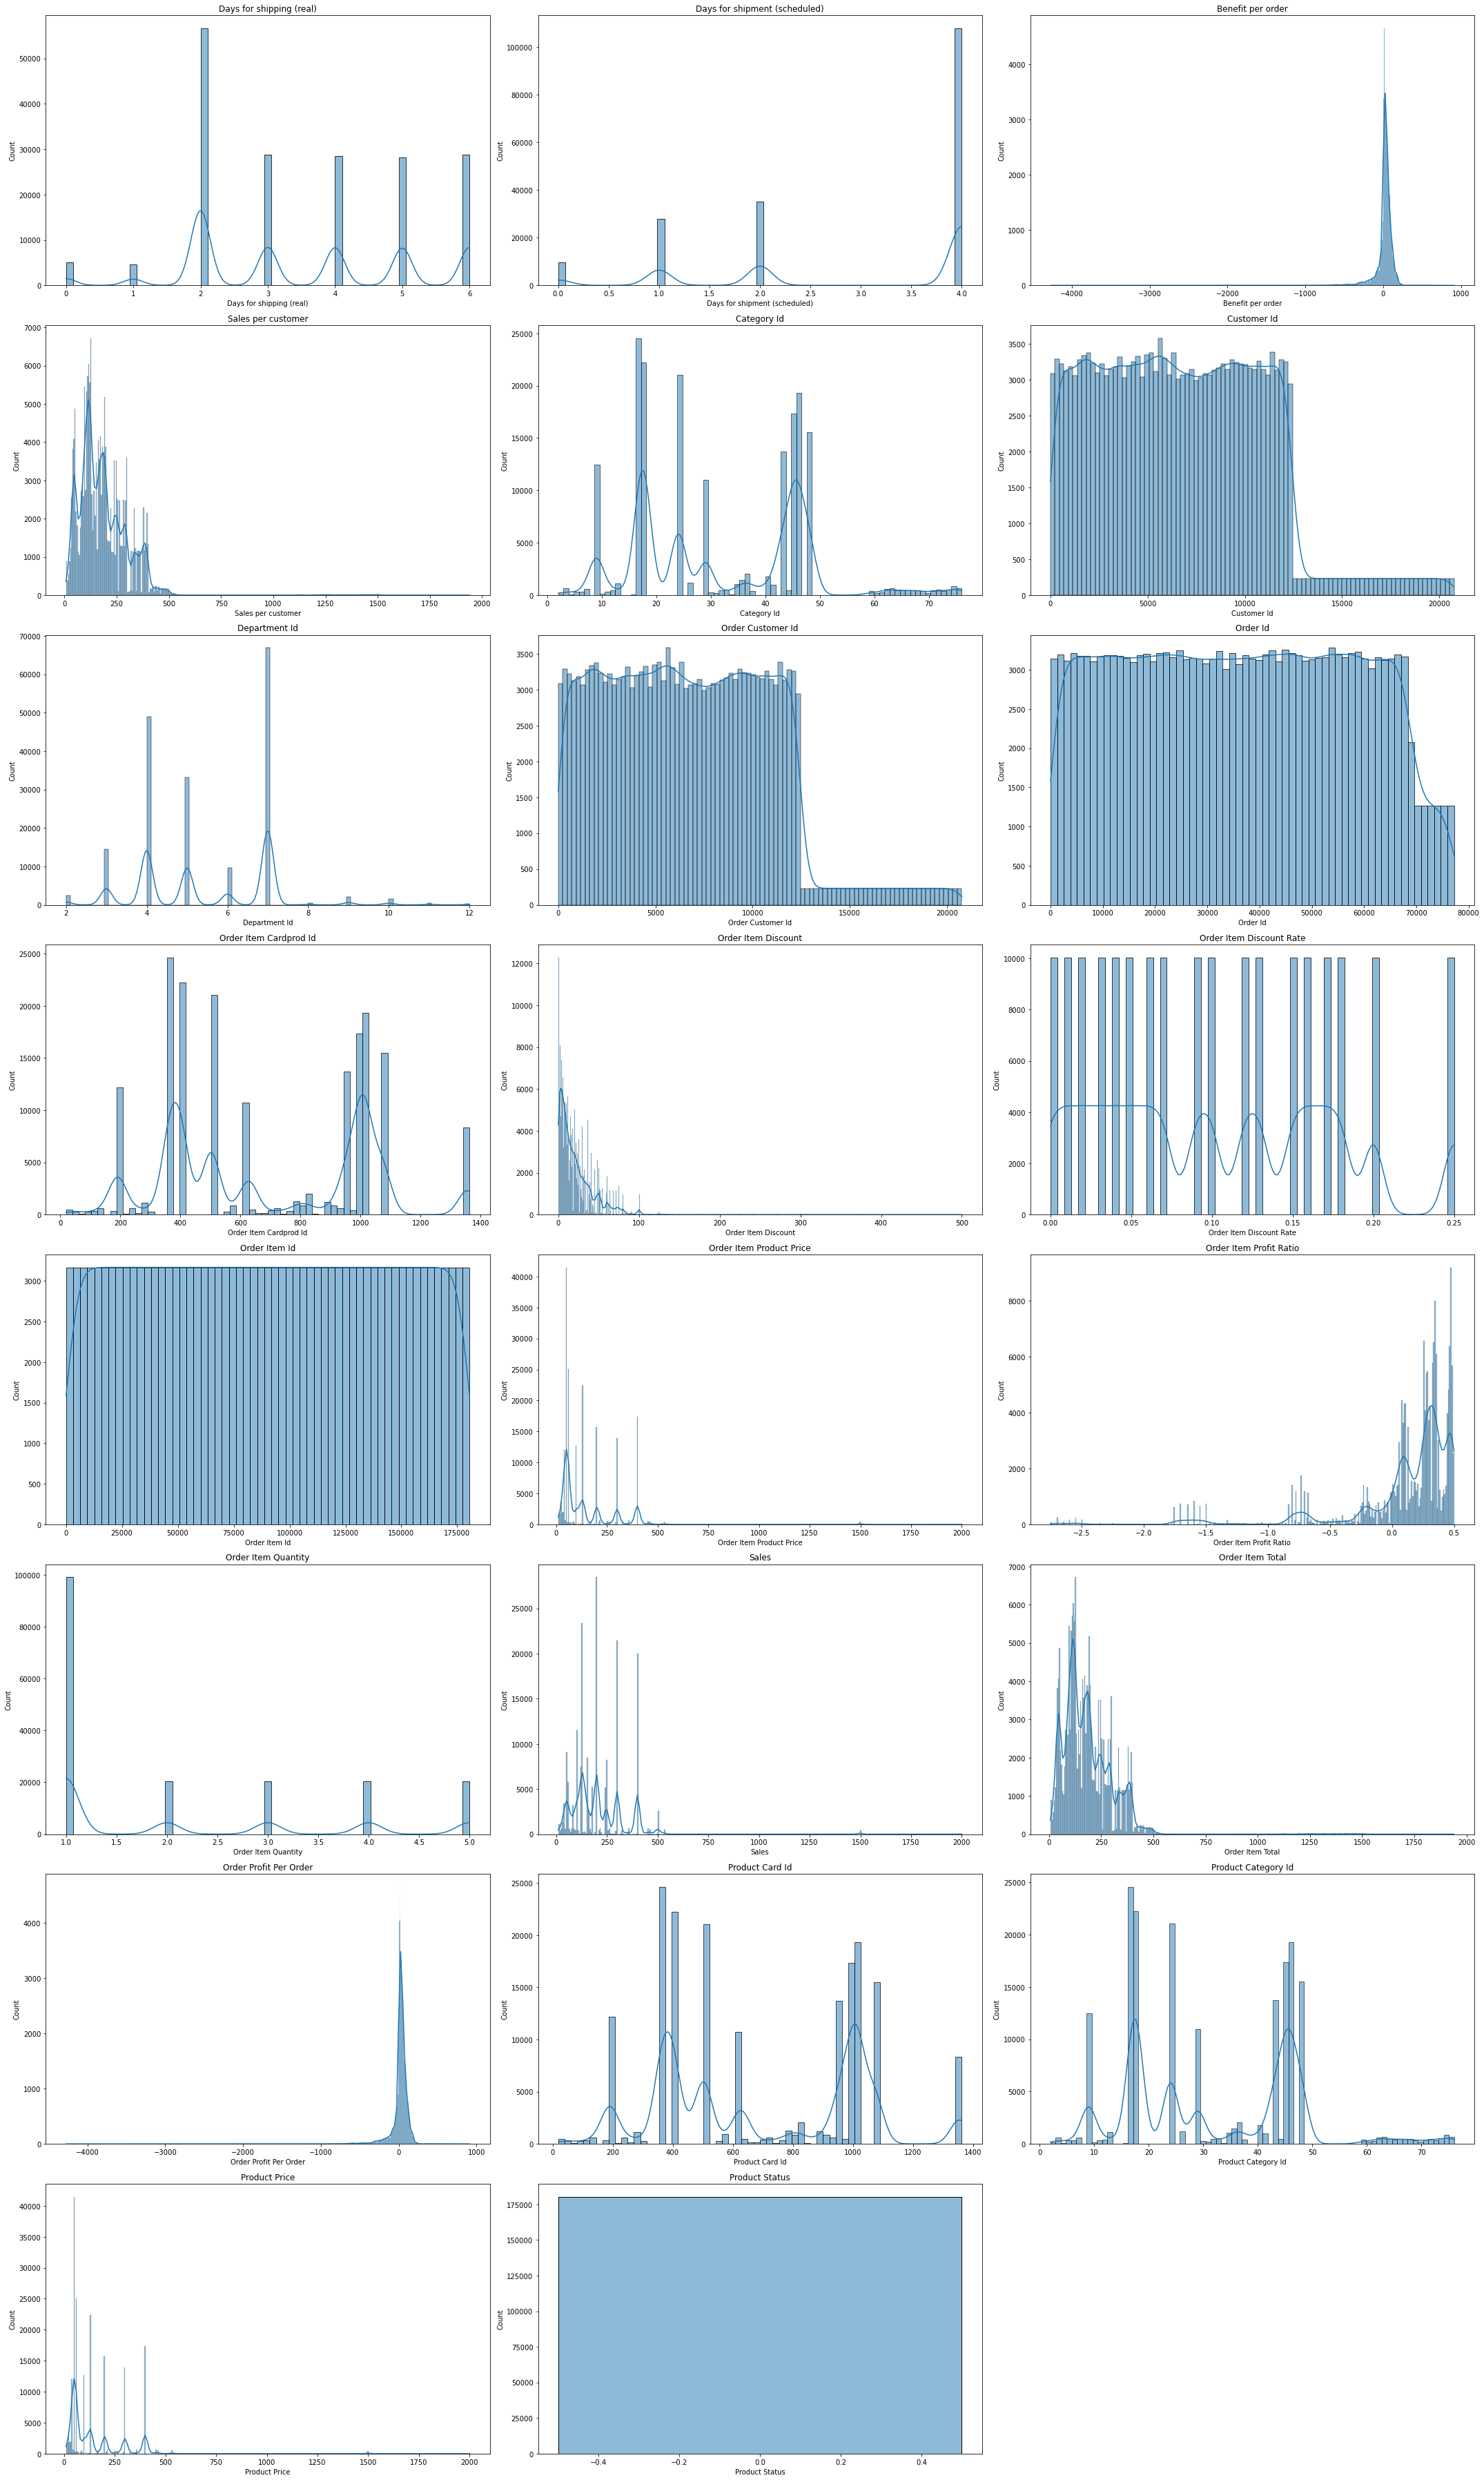

In [65]:
# Univariant numerical columns
plt.rcParams['figure.figsize']=(30,50)
ite=1
#plt.figure(figsize=(16,12))
for i in num_col:
    plt.subplot(8,3,ite)
    sns.histplot(df[i],kde=True)
    plt.title(i)
    ite+=1
plt.tight_layout()
plt.show()

# We can see majority of the data is skewed. 
# meaning there are outliers in the data

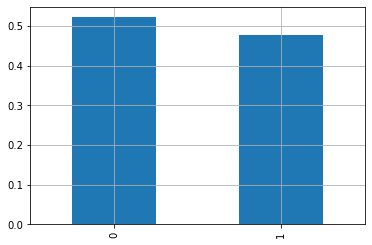

In [87]:
#business insights
#Same Day Delivery Rate
plt.rcParams['figure.figsize']=(6,4)
df[(df['Days for shipment (scheduled)']==0)]['Days for shipping (real)'].value_counts(normalize=True).plot(kind='bar')
plt.grid()
#Only 52% of Deliveries Done on Sheduled Day

<AxesSubplot:>

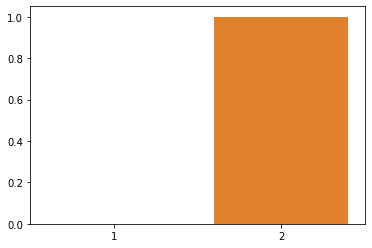

In [130]:
#Day onr Delivery Rate
df[(df['Days for shipment (scheduled)']==1)]['Days for shipping (real)'].value_counts(normalize=True)
sns.barplot([1,2],[0,1])
#No Deliveries made on Sheduled Day

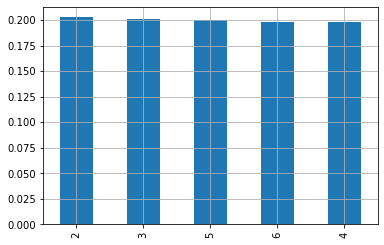

In [128]:
df[(df['Days for shipment (scheduled)']==2)]['Days for shipping (real)'].value_counts(normalize=True).plot(kind='bar')
plt.grid()
#Only 20% of the Deliveries made on Sheduled Day

In [92]:
df[(df['Days for shipment (scheduled)']==3)]['Days for shipping (real)'].value_counts(normalize=True)
#No Deliveries Sheduled on Day 3

Series([], Name: Days for shipping (real), dtype: float64)

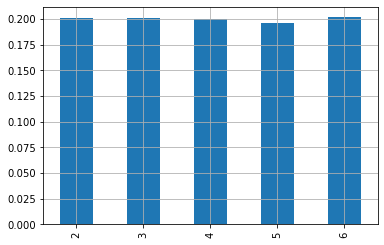

In [100]:
df[(df['Days for shipment (scheduled)']==4)]['Days for shipping (real)'].value_counts(normalize=True).sort_index().plot(kind='bar')
plt.grid()
#Only 20% of the deliveries made on Sheduled Day

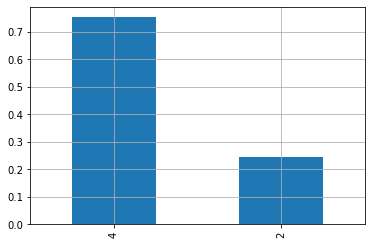

In [110]:
df[df['Days for shipping (real)']>4]['Days for shipment (scheduled)'].value_counts(normalize=True).plot(kind='bar')
plt.grid()
#The Deliveries which are scheduled to be Delivered on Day 4 are the maximun Deliveries which are Actually 
#Delivered on unScheduled Days.
#Delivery Day 2 Taking Minority in the Unscheduled Days

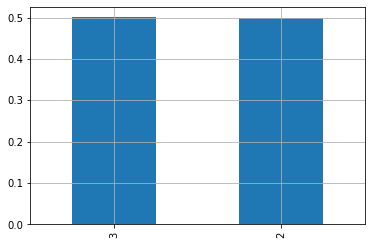

In [116]:
df[df['Days for shipment (scheduled)']>df['Days for shipping (real)']]['Days for shipping (real)'].value_counts(normalize=True).plot(kind='bar')
plt.grid()
#The Delivery Days Scheduled on Day 2 and 3 are highly possible for Fast Delivery.

<BarContainer object of 2 artists>

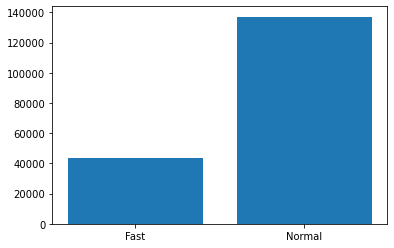

In [126]:
a=len(df[df['Days for shipment (scheduled)']>df['Days for shipping (real)']]['Days for shipping (real)'])
b=len(df)-a
plt.bar(['Fast','Normal'],[a,b])

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Product Card Id,Product Category Id,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.750000,0.29,1,327.750000,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,1360,73,Smart watch,327.750000,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.750000,-0.80,1,327.750000,311.359985,-249.089996,South Asia,Rajastán,PENDING,1360,73,Smart watch,327.750000,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.750000,-0.80,1,327.750000,309.720001,-247.779999,South Asia,Rajastán,CLOSED,1360,73,Smart watch,327.750000,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.750000,0.08,1,327.750000,304.809998,22.860001,Oceania,Queensland,COMPLETE,1360,73,Smart watch,327.750000,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,19489,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.750000,0.45,1,327.750000,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,1360,73,Smart watch,327.750000,0,1/15/2018 11:24,Standard Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,4,40.000000,399.980011,Shipping on time,0,45,Fishing,Brooklyn,EE. UU.,XXXXXXXXX,Maria,1005,Peterson,XXXXXXXXX,Home Office,NY,1322 Broad Glade,11207.0,7,Fan Shop,40.640930,-73.942711,Pacific Asia,Shanghái,China,1005,1/16/2016 3:40,26043,1004,0.000000,0.00,65177,399.980011,0.10,1,399.980011,399.980011,40.000000,Eastern Asia,Shanghái,CLOSED,1004,45,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 3:40,Standard Class
180515,DEBIT,3,2,-613.770019,395.980011,Late delivery,1,45,Fishing,Bakersfield,EE. UU.,XXXXXXXXX,Ronald,9141,Clark,XXXXXXXXX,Corporate,CA,7330 Broad Apple Moor,93304.0,7,Fan Shop,35.362545,-119.018700,Pacific Asia,Hirakata,Japón,9141,1/16/2016 1:34,26037,1004,4.000000,0.01,65161,399.980011,-1.55,1,399.980011,395.980011,-613.770019,Eastern Asia,Osaka,COMPLETE,100

In [11]:
df.select_dtypes(include='object').columns

Index(['Type', 'Delivery Status', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Department Name', 'Market',
       'Order City', 'Order Country', 'order date (DateOrders)',
       'Order Region', 'Order State', 'Order Status', 'Product Name',
       'shipping date (DateOrders)', 'Shipping Mode'],
      dtype='object')

In [12]:
cat_col=['Type', 'Delivery Status', 'Category Name', 'Customer City',
       'Customer Country','Customer Segment','Customer State', 'Customer Street', 'Department Name', 'Market',
       'Order City', 'Order Country', 'order date (DateOrders)',
       'Order Region', 'Order State', 'Order Status', 'Product Name',
       'shipping date (DateOrders)', 'Shipping Mode']
len(cat_col)

19

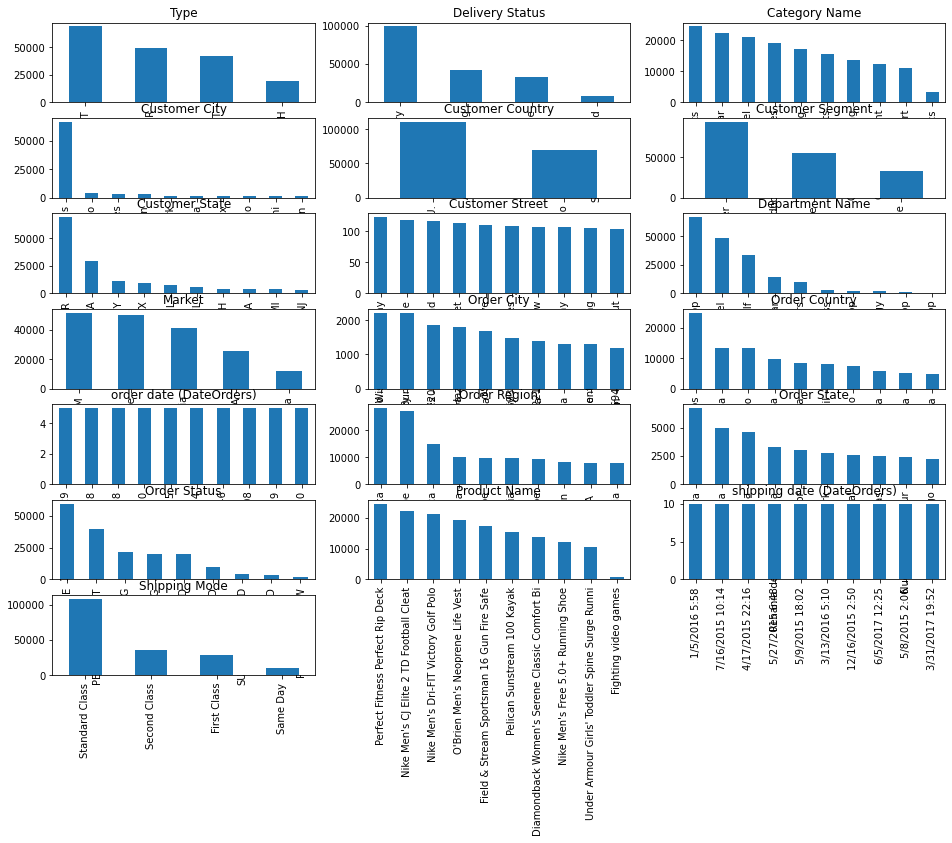

In [13]:
# Univariant analysis of categorical columns

ite=1
plt.figure(figsize=(16,12))
for i in cat_col:
    plt.subplot(7,3,ite)
    df[i].value_counts().nlargest(10).plot(kind='bar')
    plt.title(i)
    ite+=1
plt.tight_layout()
plt.show()

#### Bivariant Analysis

<AxesSubplot:xlabel='Days for shipping (real)'>

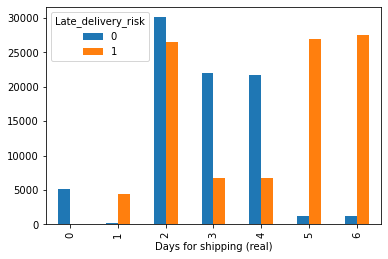

In [14]:
pd.crosstab(df['Days for shipping (real)'],df['Late_delivery_risk']).plot(kind='bar')

## Same day delivery had the least late delivery
## Whereas 5,6 has the maximum late deliveries

<AxesSubplot:xlabel='Days for shipment (scheduled)'>

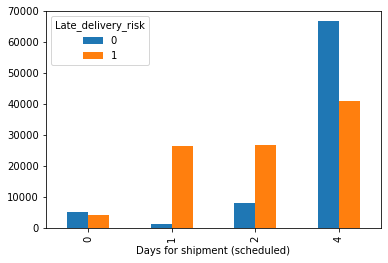

In [15]:
pd.crosstab(df['Days for shipment (scheduled)'],df['Late_delivery_risk']).plot(kind='bar')

## majority of Shipments scheduled for 1 and 2 day deliveries 
## were mostly late

<AxesSubplot:>

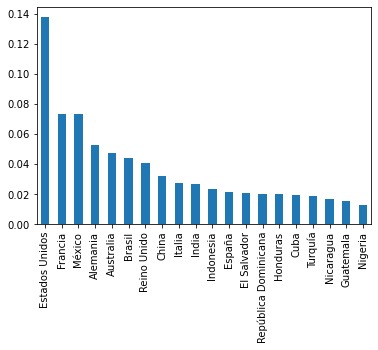

In [16]:
df['Order Country'].value_counts(normalize=True).nlargest(20).plot(kind='bar')

# Estados,France,Mexico,Alemania,Brazil are top 5 countries where deliveries are late

<AxesSubplot:>

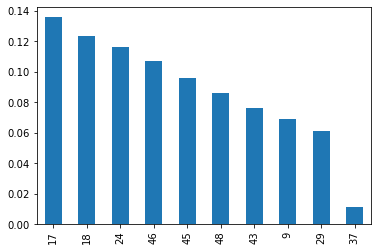

In [17]:
df['Category Id'].value_counts(normalize=True).nlargest(10).plot(kind='bar')

## category ID 17,18,24,46,45 are the top 5 categories 
## that are always supplied late

<AxesSubplot:xlabel='Shipping Mode'>

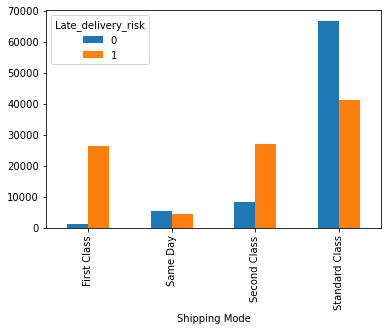

In [18]:
pd.crosstab(df['Shipping Mode'],df['Late_delivery_risk']).plot(kind='bar')

# First class and Second class had the maximum late deliveries comparitively


<AxesSubplot:xlabel='Market'>

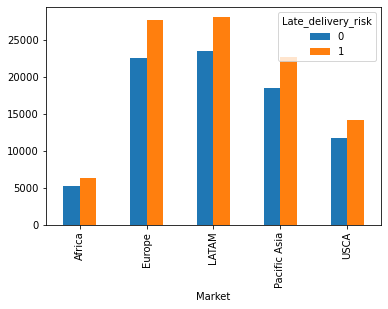

In [138]:
pd.crosstab(df['Market'],df['Late_delivery_risk']).plot(kind='bar')
# no major pattern found

In [19]:
# Check for bining / Feature Engineering / Dropping variables:

for i in df.columns:
    print('---------------------------------------------------------------------------')
    print(i)
    print('---------------------------------------------------------------------------')
    print(df[i].value_counts(normalize=True))
    print('---------------------------------------------------------------------------')

---------------------------------------------------------------------------
Type
---------------------------------------------------------------------------
DEBIT       0.383865
TRANSFER    0.276331
PAYMENT     0.231139
CASH        0.108664
Name: Type, dtype: float64
---------------------------------------------------------------------------
---------------------------------------------------------------------------
Days for shipping (real)
---------------------------------------------------------------------------
2    0.313640
3    0.159346
6    0.159113
4    0.157950
5    0.156011
0    0.028141
1    0.025798
Name: Days for shipping (real), dtype: float64
---------------------------------------------------------------------------
---------------------------------------------------------------------------
Days for shipment (scheduled)
---------------------------------------------------------------------------
4    0.596901
2    0.195082
1    0.154078
0    0.053939
Name: Days for shipm

Estados Unidos       0.137603
Francia              0.073244
México               0.072967
Alemania             0.052981
Australia            0.047070
                       ...   
Guinea Ecuatorial    0.000011
Kuwait               0.000011
Sáhara Occidental    0.000011
Burundi              0.000006
Serbia               0.000006
Name: Order Country, Length: 164, dtype: float64
---------------------------------------------------------------------------
---------------------------------------------------------------------------
Order Customer Id
---------------------------------------------------------------------------
5654     0.000260
10591    0.000249
5004     0.000249
5715     0.000244
3708     0.000244
           ...   
18698    0.000006
15537    0.000006
15484    0.000006
20681    0.000006
2677     0.000006
Name: Order Customer Id, Length: 20652, dtype: float64
---------------------------------------------------------------------------
----------------------------------------------

1/5/2016 5:58      0.000055
7/16/2015 10:14    0.000055
4/17/2015 22:16    0.000055
5/27/2015 6:48     0.000055
5/9/2015 18:02     0.000055
                     ...   
3/29/2015 18:06    0.000006
4/2/2015 12:40     0.000006
4/2/2015 23:10     0.000006
3/31/2015 7:03     0.000006
1/21/2016 5:56     0.000006
Name: shipping date (DateOrders), Length: 63701, dtype: float64
---------------------------------------------------------------------------
---------------------------------------------------------------------------
Shipping Mode
---------------------------------------------------------------------------
Standard Class    0.596901
Second Class      0.195082
First Class       0.154078
Same Day          0.053939
Name: Shipping Mode, dtype: float64
---------------------------------------------------------------------------


In [20]:
# Dropping Redundant columns and those which are not useful
print('columns before dropping',len(df.columns))
data1=df.drop(['Delivery Status','Category Name','Customer Email', 'Customer Fname', 'Customer Id',
   'Customer Lname', 'Customer Password', 'Customer Street', 'Customer Zipcode',
   'Department Name', 'Latitude', 'Longitude','Order Customer Id','order date (DateOrders)', 
   'Order Id', 'Order Item Cardprod Id','Order Item Discount','Order Item Id','Order Region', 
   'Order State','Order City','Product Card Id', 'Product Category Id', 'Product Name',
   'Product Price', 'Product Status', 'shipping date (DateOrders)'],1)
print('columns after dropping',len(data1.columns))

columns before dropping 50
columns after dropping 23


#### Binning data

In [21]:
#category ID as Top 5 and other

cat=[17,18,24,46,45]

def categories(x):
    if x in cat:
        return ('Top5')
    else:
        return ('Other')
    
data1['Category Id']=data1['Category Id'].apply(categories)

In [22]:
# customer State - top 2 states

#df['Customer State'].value_counts(normalize=True)
st=['PR','CA']
def state(x):
    if x in st:
        return ("Top2")
    else:
        return ('Other')
    
data1['Customer State']=data1['Customer State'].apply(state)

In [23]:
# Quantity - 1 or more than 1

def qty(x):
    if x==1:
        return ("1")
    else:
        return ('More than 1')
    
data1['Order Item Quantity']=data1['Order Item Quantity'].apply(qty)

In [24]:
# Order Country - top 10 or Other

country=['Estados Unidos', 'Francia', 'México', 'Alemania', 'Australia']

def cnty(x):
    if x in country:
        return ("Top10")
    else:
        return ('Other')
    
data1['Order Country']=data1['Order Country'].apply(cnty)

In [25]:
# Department id - Top3 or other

dep_id=[7, 4, 5]
def d_id(x):
    if x in dep_id:
        return ("Top3")
    else:
        return ('Other')
    
data1['Department Id']=data1['Department Id'].apply(d_id)

In [27]:
# Customer City - Top50 or other

city=['Caguas', 'Chicago', 'Los Angeles', 'Brooklyn', 'New York',
       'Philadelphia', 'Bronx', 'San Diego', 'Miami', 'Houston', 'Las Vegas',
       'Dallas', 'Aurora', 'Detroit', 'Phoenix', 'San Jose', 'Cleveland',
       'Lancaster', 'San Antonio', 'Memphis', 'Virginia Beach', 'El Paso',
       'Fort Lauderdale', 'Columbus', 'Washington', 'Honolulu', 'Tucson',
       'Bakersfield', 'Baltimore', 'Albuquerque', 'Long Beach', 'Newark',
       'Saint Paul', 'Pompano Beach', 'Santa Ana', 'New Orleans', 'Tempe',
       'Hialeah', 'Riverside', 'Orlando', 'San Francisco', 'Atlanta', 'Fresno',
       'Corona', 'Portland', 'Saint Louis', 'Escondido', 'Fort Worth',
       'Ontario', 'Sacramento']

def cty(x):
    if x in city:
        return ("Top50")
    else:
        return ('Other')
    
data1['Customer City']=data1['Customer City'].apply(cty)

In [28]:
data1.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer City,Customer Country,Customer Segment,Customer State,Department Id,Market,Order Country,Order Item Discount Rate,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Status,Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,0,Other,Other,Puerto Rico,Consumer,Top2,Other,Pacific Asia,Other,0.04,327.75,0.29,1,327.75,314.640015,91.250000,COMPLETE,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,1,Other,Other,Puerto Rico,Consumer,Top2,Other,Pacific Asia,Other,0.05,327.75,-0.80,1,327.75,311.359985,-249.089996,PENDING,Standard Class
2,CASH,4,4,-247.779999,309.720001,0,Other,Other,EE. UU.,Consumer,Top2,Other,Pacific Asia,Other,0.06,327.75,-0.80,1,327.75,309.720001,-247.779999,CLOSED,Standard Class
3,DEBIT,3,4,22.860001,304.809998,0,Other,Other,EE. UU.,Home Office,Top2,Other,Pacific Asia,Top10,0.07,327.75,0.08,1,327.75,304.809998,22.860001,COMPLETE,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,0,Other,Other,Puerto Rico,Corporate,Top2,Other,Pacific Asia,Top10,0.09,327.75,0.45,1,327.75,298.250000,134.210007,PENDING_PAYMENT,Standard Class


Defining X and Y

In [29]:
x=data1.drop('Late_delivery_risk',1)
y=data1['Late_delivery_risk']

In [30]:
x[['Sales per customer','Order Item Product Price','Sales','Order Item Total']].head(50)

,Sales per customer,Order Item Product Price,Sales,Order Item Total
0,314.640015,327.750000,327.750000,314.640015
1,311.359985,327.750000,327.750000,311.359985
2,309.720001,327.750000,327.750000,309.720001
3,304.809998,327.750000,327.750000,304.809998
4,298.250000,327.750000,327.750000,298.250000
5,294.980011,327.750000,327.750000,294.980011
6,288.420013,327.750000,327.750000,288.420013
7,285.140015,327.750000,327.750000,285.140015
8,278.589996,327.750000,327.750000,278.589996
9,275.309998,327.750000,327.750000,275.309998


#### Sales per customer,Benefit per order & Order Item Product Price are redundant hence we drop.

In [31]:
x.drop(['Sales per customer','Order Item Product Price'],1,inplace=True)

In [32]:
x.drop('Benefit per order',1,inplace=True)

In [33]:
x.head(2)

,Type,Days for shipping (real),Days for shipment (scheduled),Category Id,Customer City,Customer Country,Customer Segment,Customer State,Department Id,Market,Order Country,Order Item Discount Rate,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Status,Shipping Mode
0,DEBIT,3,4,Other,Other,Puerto Rico,Consumer,Top2,Other,Pacific Asia,Other,0.04,0.29,1,327.75,314.640015,91.250000,COMPLETE,Standard Class
1,TRANSFER,5,4,Other,Other,Puerto Rico,Consumer,Top2,Other,Pacific Asia,Other,0.05,-0.80,1,327.75,311.359985,-249.089996,PENDING,Standard Class


#### Target Encoding 

In [34]:
trgt=['Days for shipping (real)','Days for shipment (scheduled)',
     'Order Item Discount Rate','Order Item Profit Ratio','Sales',
     'Order Item Total','Order Profit Per Order']


In [35]:
import category_encoders as ce

In [36]:
tgt=ce.TargetEncoder(cols=trgt)

newx= tgt.fit_transform(x,y)

In [37]:
newx.head(1)

,Type,Days for shipping (real),Days for shipment (scheduled),Category Id,Customer City,Customer Country,Customer Segment,Customer State,Department Id,Market,Order Country,Order Item Discount Rate,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Status,Shipping Mode
0,DEBIT,0.234973,0.380717,Other,Other,Puerto Rico,Consumer,Top2,Other,Pacific Asia,Other,0.549606,0.553852,1,0.554622,0.65,0.65625,COMPLETE,Standard Class


#### One-Hot-Encoding

In [38]:
dummyx=pd.get_dummies(newx,drop_first=True)

#### Train Test Split 

In [39]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest=train_test_split(dummyx,y,test_size=0.3,random_state=0)

#### Modelling

In [40]:
metrics=pd.DataFrame(columns=['Model','Accuracy_Score_Train','Accuracy_Score_Test'])

In [41]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as skm

lg=LogisticRegression()

ypred=lg.fit(xtrain,ytrain).predict(xtest)


print('Train',skm.classification_report(ytrain,lg.predict(xtrain)))
print('Test',skm.classification_report(ytest,ypred))

metrics=metrics.append({'Model':'Logistic Regression','Accuracy_Score_Train':94,'Accuracy_Score_Test':93},ignore_index=True)

Train               precision    recall  f1-score   support

           0       0.94      0.92      0.93     56948
           1       0.93      0.95      0.94     69415

    accuracy                           0.94    126363
   macro avg       0.94      0.93      0.93    126363
weighted avg       0.94      0.94      0.94    126363

Test               precision    recall  f1-score   support

           0       0.94      0.92      0.93     24594
           1       0.93      0.95      0.94     29562

    accuracy                           0.94     54156
   macro avg       0.94      0.93      0.94     54156
weighted avg       0.94      0.94      0.94     54156



In [42]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier(random_state=0)

ypred=dt.fit(xtrain,ytrain).predict(xtest)


print('Train',skm.classification_report(ytrain,dt.predict(xtrain)))
print('Test',skm.classification_report(ytest,ypred))

Train               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56948
           1       1.00      1.00      1.00     69415

    accuracy                           1.00    126363
   macro avg       1.00      1.00      1.00    126363
weighted avg       1.00      1.00      1.00    126363

Test               precision    recall  f1-score   support

           0       1.00      1.00      1.00     24594
           1       1.00      1.00      1.00     29562

    accuracy                           1.00     54156
   macro avg       1.00      1.00      1.00     54156
weighted avg       1.00      1.00      1.00     54156



Since the model is overfitting we go for grid search cv to reduce over fitting

In [43]:
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier,RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold

In [44]:
ada=AdaBoostClassifier(random_state=0)

ypred=ada.fit(xtrain,ytrain).predict(xtest)


print('Train',skm.classification_report(ytrain,ada.predict(xtrain)))
print('Test',skm.classification_report(ytest,ypred))

Train               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56948
           1       1.00      1.00      1.00     69415

    accuracy                           1.00    126363
   macro avg       1.00      1.00      1.00    126363
weighted avg       1.00      1.00      1.00    126363

Test               precision    recall  f1-score   support

           0       1.00      1.00      1.00     24594
           1       1.00      1.00      1.00     29562

    accuracy                           1.00     54156
   macro avg       1.00      1.00      1.00     54156
weighted avg       1.00      1.00      1.00     54156



In [45]:
bag=BaggingClassifier(random_state=0)

ypred=bag.fit(xtrain,ytrain).predict(xtest)


print('Train',skm.classification_report(ytrain,bag.predict(xtrain)))
print('Test',skm.classification_report(ytest,ypred))

Train               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56948
           1       1.00      1.00      1.00     69415

    accuracy                           1.00    126363
   macro avg       1.00      1.00      1.00    126363
weighted avg       1.00      1.00      1.00    126363

Test               precision    recall  f1-score   support

           0       1.00      1.00      1.00     24594
           1       1.00      1.00      1.00     29562

    accuracy                           1.00     54156
   macro avg       1.00      1.00      1.00     54156
weighted avg       1.00      1.00      1.00     54156



In [46]:
gbm=GradientBoostingClassifier(random_state=0)

ypred=gbm.fit(xtrain,ytrain).predict(xtest)


print('Train',skm.classification_report(ytrain,gbm.predict(xtrain)))
print('Test',skm.classification_report(ytest,ypred))

Train               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56948
           1       1.00      1.00      1.00     69415

    accuracy                           1.00    126363
   macro avg       1.00      1.00      1.00    126363
weighted avg       1.00      1.00      1.00    126363

Test               precision    recall  f1-score   support

           0       1.00      1.00      1.00     24594
           1       1.00      1.00      1.00     29562

    accuracy                           1.00     54156
   macro avg       1.00      1.00      1.00     54156
weighted avg       1.00      1.00      1.00     54156



In [47]:
rf=RandomForestClassifier(random_state=0)

ypred=rf.fit(xtrain,ytrain).predict(xtest)


print('Train',skm.classification_report(ytrain,rf.predict(xtrain)))
print('Test',skm.classification_report(ytest,ypred))

Train               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56948
           1       1.00      1.00      1.00     69415

    accuracy                           1.00    126363
   macro avg       1.00      1.00      1.00    126363
weighted avg       1.00      1.00      1.00    126363

Test               precision    recall  f1-score   support

           0       1.00      1.00      1.00     24594
           1       1.00      1.00      1.00     29562

    accuracy                           1.00     54156
   macro avg       1.00      1.00      1.00     54156
weighted avg       1.00      1.00      1.00     54156



In [48]:
xgb=XGBClassifier(random_state=0)

ypred=xgb.fit(xtrain,ytrain).predict(xtest)


print('Train',skm.classification_report(ytrain,xgb.predict(xtrain)))
print('Test',skm.classification_report(ytest,ypred))

Train               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56948
           1       1.00      1.00      1.00     69415

    accuracy                           1.00    126363
   macro avg       1.00      1.00      1.00    126363
weighted avg       1.00      1.00      1.00    126363

Test               precision    recall  f1-score   support

           0       1.00      1.00      1.00     24594
           1       1.00      1.00      1.00     29562

    accuracy                           1.00     54156
   macro avg       1.00      1.00      1.00     54156
weighted avg       1.00      1.00      1.00     54156



In [49]:
lgbm=LGBMClassifier(random_state=0)

ypred=lgbm.fit(xtrain,ytrain).predict(xtest)


print('Train',skm.classification_report(ytrain,lgbm.predict(xtrain)))
print('Test',skm.classification_report(ytest,ypred))

Train               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56948
           1       1.00      1.00      1.00     69415

    accuracy                           1.00    126363
   macro avg       1.00      1.00      1.00    126363
weighted avg       1.00      1.00      1.00    126363

Test               precision    recall  f1-score   support

           0       1.00      1.00      1.00     24594
           1       1.00      1.00      1.00     29562

    accuracy                           1.00     54156
   macro avg       1.00      1.00      1.00     54156
weighted avg       1.00      1.00      1.00     54156



#### Parameter tuning RandomForest

In [50]:
params={'n_estimators':[100,75,50,25],
       'criterion':['gini', 'entropy'],
       'max_depth':[1,2,3]}

rf=RandomForestClassifier(random_state=0)
grid=GridSearchCV(estimator=rf,param_grid=params,cv=5)

grid.fit(dummyx,y)

grid.best_params_

{'criterion': 'gini', 'max_depth': 3, 'n_estimators': 100}

In [184]:
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=0)


rf=RandomForestClassifier(n_estimators=25,criterion='entropy',max_depth=3)

pred=[]

for train_index,test_index in kfold.split(dummyx,y):
    xtrain=dummyx.iloc[train_index]
    ytrain=y.iloc[train_index]
    pred.append(rf.fit(xtrain,ytrain).predict(xtest))
    #print(skm.accuracy_score(ytest,pred))


finalpred=pd.DataFrame(pred).T.mode(axis=1)[0]
skm.accuracy_score(ytest,finalpred)

0.9468941576187311

In [185]:
skm.accuracy_score(ytrain,rf.predict(xtrain))

0.9376523376911146

In [206]:
metrics=metrics.append({'Model':'RF Tuned','Accuracy_Score_Train':93.7,'Accuracy_Score_Test':94.6},ignore_index=True)

#### Parameter tuning XGBoost

In [190]:
params={'n_estimators':[100,75,50,25],
        'max_depth':[1,2,3],
       'learning_rate':[0.05,0.1,0.15,0.2]}

xgb=XGBClassifier(random_state=0)

grid=GridSearchCV(estimator=xgb,param_grid=params,cv=5)

grid.fit(dummyx,y)

grid.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

In [193]:
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=0)


xgb=XGBClassifier(n_estimators=100,max_depth=2,learning_rate=0.1)

pred=[]

for train_index,test_index in kfold.split(dummyx,y):
    xtrain=dummyx.iloc[train_index]
    ytrain=y.iloc[train_index]
    pred.append(xgb.fit(xtrain,ytrain).predict(xtest))
    #print(skm.accuracy_score(ytest,pred))


finalpred=pd.DataFrame(pred).T.mode(axis=1)[0]
skm.accuracy_score(ytest,finalpred)

0.9882376837284881

In [194]:
skm.accuracy_score(ytrain,xgb.predict(xtrain))

0.9883877132727675

In [207]:
metrics=metrics.append({'Model':'XGBoost Tuned','Accuracy_Score_Train':98,'Accuracy_Score_Test':98},ignore_index=True)

In [208]:
metrics

,Model,Accuracy_Score_Train,Accuracy_Score_Test
0,Logistic Regression,94,93
1,RF Tuned,93.7,94.6
2,XGBoost Tuned,98,98


#### Parameter tuning Gradient Boosting

In [209]:
params={'loss':['log_loss', 'deviance','exponential'],
       'n_estimators':[100,75,50,25],
       'criterion':['friedman_mse', 'squared_error'],
       'min_samples_split':[2,4,6,8],
       'max_depth':[1,2,3]}

gbm=GradientBoostingClassifier(random_state=0)

grid=GridSearchCV(estimator=gbm,param_grid=params,cv=5)

grid.fit(dummyx,y)

grid.best_params_

{'criterion': 'friedman_mse',
 'loss': 'log_loss',
 'max_depth': 3,
 'min_samples_split': 2,
 'n_estimators': 100}

In [210]:
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=0)


gbm=GradientBoostingClassifier(criterion= 'friedman_mse',loss= 'log_loss',max_depth= 3,min_samples_split= 2,
                                       n_estimators= 100)

pred=[]

for train_index,test_index in kfold.split(dummyx,y):
    xtrain=dummyx.iloc[train_index]
    ytrain=y.iloc[train_index]
    pred.append(gbm.fit(xtrain,ytrain).predict(xtest))
    #print(skm.accuracy_score(ytest,pred))


finalpred=pd.DataFrame(pred).T.mode(axis=1)[0]
skm.accuracy_score(ytest,finalpred)

1.0

In [211]:
skm.accuracy_score(ytrain,gbm.predict(xtrain))

1.0

In [212]:
metrics=metrics.append({'Model':'GradientBoosting Tuned','Accuracy_Score_Train':100,'Accuracy_Score_Test':100},ignore_index=True)

In [213]:
metrics

,Model,Accuracy_Score_Train,Accuracy_Score_Test
0,Logistic Regression,94,93
1,RF Tuned,93.7,94.6
2,XGBoost Tuned,98,98
3,GradientBoosting Tuned,100,100


#### parameter tuning DecisionTree

In [216]:
params={'criterion':['gini', 'entropy'],
        'splitter':["best", "random"],
       'max_depth':[1,2,3]}

dt=DecisionTreeClassifier(random_state=0)
grid=GridSearchCV(estimator=dt,param_grid=params,cv=5,verbose=1)

grid.fit(dummyx,y)

grid.best_params_

Fitting 5 folds for each of 12 candidates, totalling 60 fits


{'criterion': 'gini', 'max_depth': 3, 'splitter': 'random'}

In [217]:
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=0)


dt=DecisionTreeClassifier(criterion='gini',splitter='random',max_depth=3)

pred=[]

for train_index,test_index in kfold.split(dummyx,y):
    xtrain=dummyx.iloc[train_index]
    ytrain=y.iloc[train_index]
    pred.append(dt.fit(xtrain,ytrain).predict(xtest))
    #print(skm.accuracy_score(ytest,pred))


finalpred=pd.DataFrame(pred).T.mode(axis=1)[0]
print(skm.accuracy_score(ytest,finalpred))

print(skm.accuracy_score(ytrain,dt.predict(xtrain)))

metrics=metrics.append({'Model':'DecisionTree Tuned','Accuracy_Score_Train':skm.accuracy_score(ytrain,dt.predict(xtrain)),'Accuracy_Score_Test':skm.accuracy_score(ytest,finalpred)},ignore_index=True)

0.9451399660240786
0.9435450365610458


In [228]:
metrics=metrics.append({'Model':'DecisionTree Tuned','Accuracy_Score_Train':94.35,'Accuracy_Score_Test':94.51},ignore_index=True)

In [256]:
metrics

,Model,Accuracy_Score_Train,Accuracy_Score_Test
0,Logistic Regression,94,93
1,RF Tuned,93.7,94.6
2,XGBoost Tuned,98,98
3,GradientBoosting Tuned,100,100
4,DecisionTree Tuned,94.35,94.51
5,RF Tuned 2,94.35,94


#### parameter tuning RandomForest 2

In [301]:
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=0)


rf=RandomForestClassifier(n_estimators=50,criterion='entropy',max_depth=2)

pred=[]

for train_index,test_index in kfold.split(dummyx,y):
    xtrain=dummyx.iloc[train_index]
    ytrain=y.iloc[train_index]
    pred.append(rf.fit(xtrain,ytrain).predict(xtest))
    #print(skm.accuracy_score(ytest,pred))


finalpred=pd.DataFrame(pred).T.mode(axis=1)[0]
print(skm.accuracy_score(ytest,finalpred))

print(skm.accuracy_score(ytrain,rf.predict(xtrain)))

0.9410222320703154
0.9420355085309107


In [304]:
metrics=metrics.append({'Model':'RF Tuned 2','Accuracy_Score_Train':94.20,'Accuracy_Score_Test':94.1},ignore_index=True)

In [305]:
metrics

,Model,Accuracy_Score_Train,Accuracy_Score_Test
0,Logistic Regression,94,93
1,RF Tuned,93.7,94.6
2,XGBoost Tuned,98,98
3,GradientBoosting Tuned,100,100
4,DecisionTree Tuned,94.35,94.51
5,RF Tuned 2,94.2,94.1


<Figure size 3600x3600 with 0 Axes>

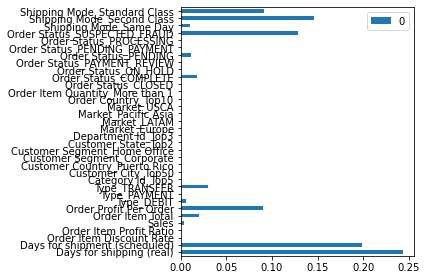

In [307]:
plt.figure(figsize=(50,50))
pd.DataFrame(rf.feature_importances_,index=dummyx.columns).plot(kind='barh')
plt.tight_layout()
plt.show()

In [308]:
imp_features=['Shipping Mode_Same Day','Shipping Mode_Second Class', 'Shipping Mode_Standard Class',
             'Order Status_SUSPECTED_FRAUD','Order Status_PENDING','Order Status_COMPLETE',
              'Type_DEBIT','Type_PAYMENT', 'Type_TRANSFER','Sales',
             'Order Item Total', 'Order Profit Per Order','Days for shipping (real)', 'Days for shipment (scheduled)']
len(imp_features)

14

In [309]:
finalx=dummyx[imp_features]

In [310]:
finalx

,Shipping Mode_Same Day,Shipping Mode_Second Class,Shipping Mode_Standard Class,Order Status_SUSPECTED_FRAUD,Order Status_PENDING,Order Status_COMPLETE,Type_DEBIT,Type_PAYMENT,Type_TRANSFER,Sales,Order Item Total,Order Profit Per Order,Days for shipping (real),Days for shipment (scheduled)
0,0,0,1,0,0,1,1,0,0,0.554622,0.650000,0.656250,0.234973,0.380717
1,0,0,1,0,1,0,0,0,1,0.554622,0.650000,0.548291,0.958811,0.380717
2,0,0,1,0,0,0,0,0,0,0.554622,0.700000,0.548291,0.237050,0.380717
3,0,0,1,0,0,1,1,0,0,0.554622,0.500000,0.624930,0.234973,0.380717
4,0,0,1,0,0,0,0,1,0,0.554622,0.400000,0.652556,0.468279,0.380717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,0,0,1,0,0,0,0,0,0,0.549264,0.570686,0.647727,0.237050,0.380717
180515,0,1,0,0,0,1,1,0,0,0.549264,0.543659,0.400018,0.234973,0.766328
180516,0,0,1,0,1,0,0,0,1,0.549264,0.514553,0.459459,0.958811,0.380717
180517,0,0,1,0,0,0,0,1,0,0.549264,0.539501,0.471698,0.234973,0.380717


In [311]:
xtrain2,xtest2,ytrain2,ytest2=train_test_split(finalx,y,test_size=0.3,random_state=0)

In [312]:
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=0)


rf=RandomForestClassifier(n_estimators=50,criterion='entropy',max_depth=2)

pred=[]

for train_index,test_index in kfold.split(finalx,y):
    xtraink=finalx.iloc[train_index]
    ytraink=y.iloc[train_index]
    pred.append(rf.fit(xtraink,ytraink).predict(xtest2))
    


finalpred=pd.DataFrame(pred).T.mode(axis=1)[0]
print(skm.accuracy_score(ytest2,finalpred))

print(skm.accuracy_score(ytrain2,rf.predict(xtrain2)))

0.9418716301056208
0.941731361237071


In [313]:
metrics=metrics.append({'Model':'RF Important Features','Accuracy_Score_Train':94.17,'Accuracy_Score_Test':94.18},ignore_index=True)

In [314]:
metrics

,Model,Accuracy_Score_Train,Accuracy_Score_Test
0,Logistic Regression,94,93
1,RF Tuned,93.7,94.6
2,XGBoost Tuned,98,98
3,GradientBoosting Tuned,100,100
4,DecisionTree Tuned,94.35,94.51
5,RF Tuned 2,94.2,94.1
6,RF Important Features,94.17,94.18


In [315]:
imp_features
# Hence the Below 14 features are enough to build the model

# In real the 8 features before encoding are enough for model prediction 
# Shipping Mode,Order Status,Type,Sales,Order Item Total,
# Order Profit Per Order,Days for shipping (real),Days for shipment (scheduled)

['Shipping Mode_Same Day',
 'Shipping Mode_Second Class',
 'Shipping Mode_Standard Class',
 'Order Status_SUSPECTED_FRAUD',
 'Order Status_PENDING',
 'Order Status_COMPLETE',
 'Type_DEBIT',
 'Type_PAYMENT',
 'Type_TRANSFER',
 'Sales',
 'Order Item Total',
 'Order Profit Per Order',
 'Days for shipping (real)',
 'Days for shipment (scheduled)']